# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def myint(n_binario): # Definimos la función
  if len(n_binario) != 16: # Verificamos que la cadena tenga exactamente 16 bits
    raise ValueError('El numero debe tener 16 bits')
  valor_entero= 0
  potencia = 0
  for i in reversed(n_binario): #Recorremos los bits de derecha a izquierda
    if i == '1':
      valor_entero += 2**potencia
    potencia += 1
  return valor_entero

#Comparamos con el valor solicitado
myint('0001000011100001')
print(myint('0001000011100001'))

int(0b1000011100001)
print(int(0b1000011100001))

4321
4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [5]:
def number64(n_binario):
  if len(n_binario) != 64:
    raise ValueError('El numero debe tener 64 bits')

  #Bit de signo
  signo = int(n_binario[0])

  #Bits de exponente (bits 1 al 11)
  exp_bin = n_binario[1:12] #Toma los bits desde la posición 1 hasta la 11
  exponente = int(exp_bin, 2) - 1023 #Convierte los bits del exponente a entero y ajusta el sesgo (bias) de 1023

  #Bits de mantisa (bits 12 al 63)
  mantisa_bin = n_binario[12:64]
  mantisa = 0.0
  for i, bit in enumerate(mantisa_bin):
    if bit == '1':
      mantisa += 2**-(i + 1)

  valor = (-1)**signo * (1 + mantisa) * 2**exponente
  return valor

print(number64("0100000000111011100100001111111111111111111111111111111111111111"))

27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [8]:
#Aproximación Básica
def arctan(x,N):
  sumatoria=0
  for i in range(1,N+1):
    termino = ((-1)**(i+1)) * ((x**(2*i-1)))/(2*i-1)
    sumatoria += termino
  return sumatoria
pi_aprox=0
n =1
tol= 1e-3
while True:
  pi_aprox = 4* arctan(1,n)
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
n, pi_aprox
print(f'El número de n ncesarios  para que  |4Pn(1)−π|<10−3 es: {n}')
print(f'El valor aproximado de pi es: {pi_aprox}')

El número de n ncesarios  para que  |4Pn(1)−π|<10−3 es: 1000
El valor aproximado de pi es: 3.140592653839794


In [ ]:
#Valor de pi dentro de un error de  10e-4
pi_aprox=0
n =1
tol= 1e-4
while True:
  pi_aprox = 4* arctan(1,n)
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
print(f'Se necesitarían {n} términos para obtener esta precisión')

Se necesitarían 10000 términos para obtener esta precisión


In [9]:
#Mejora de convergencia con tol= 10e-3
pi_aprox=0
n =1
tol= 1e-3
while True:
  pi_aprox= 4*(arctan(1/2,n)+arctan(1/3,n))
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
print(f'El número de n necesarios usando la identidad π/4=arctan(1/2)+arctan(1/3) y una tolerancia de 10e-3 es: {n}')
print(f'El valor aproximado de pi es: {pi_aprox}')

El número de n necesarios usando la identidad π/4=arctan(1/2)+arctan(1/3) y una tolerancia de 10e-3 es: 4
El valor aproximado de pi es: 3.1408505617610554


In [10]:
#Mejora de convergencia con tol= 10e-6
pi_aprox=0
n =1
tol= 1e-6
while True:
  pi_aprox= 4*(arctan(1/2,n)+arctan(1/3,n))
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
print(f'El número de n necesarios usando la identidad π/4=arctan(1/2)+arctan(1/3) y una tolerancia de 10e-6 es: {n}')
print(f'El valor aproximado de pi es: {pi_aprox}')

El número de n necesarios usando la identidad π/4=arctan(1/2)+arctan(1/3) y una tolerancia de 10e-6 es: 9
El valor aproximado de pi es: 3.1415929813345667


In [11]:
#Método de alta precisión con tol=10-3
pi_aprox=0
n =1
tol= 1e-3
while True:
  pi_aprox= 4*(4*(arctan(1/5,n))-arctan(1/239,n))
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
print(f'El número de n necesarios usando la identidad π/4=4arctan(1/5)-arctan(1/239) y una tolerancia de 10e-3 es: {n}')
print(f'El valor aproximado de pi es: {pi_aprox}')

El número de n necesarios usando la identidad π/4=4arctan(1/5)-arctan(1/239) y una tolerancia de 10e-3 es: 2
El valor aproximado de pi es: 3.1405970293260603


In [12]:
#Método de alta precisión con tol=10-6
pi_aprox=0
n =1
tol= 1e-6
while True:
  pi_aprox= 4*(4*(arctan(1/5,n))-arctan(1/239,n))
  if abs(pi_aprox - math.pi) < tol:
    break
  n += 1
print(f'El número de n necesarios usando la identidad π/4=4arctan(1/5)-arctan(1/239) y una tolerancia de 10e-6 es: {n}')
print(f'El valor aproximado de pi es: {pi_aprox}')

El número de n necesarios usando la identidad π/4=4arctan(1/5)-arctan(1/239) y una tolerancia de 10e-6 es: 4
El valor aproximado de pi es: 3.1415917721821773


In [ ]:
#Comparación entre métodos
print(f'Usando la aproximación básica el número de términos requeridos son: 1000')
print(f'Usando la mejora de convergencia el número de términos requeridos con tol=10-3 son: 4, y con tol= 10e-6 son: 9')
print(f'Usando el método de alta precisión el número de términos requeridos con tol=10-3 son: 2, y con tol= 10e-6 son: 4 ')
print('Por lo tanto el método más efectivo, es, en efecto el método de alta precisión')

Usando la aproximación básica el número de términos requeridos son: 1000
Usando la mejora de convergencia el número de términos requeridos con tol=10-3 son: 4, y con tol= 10e-6 son: 9
Usando el método de alta precisión el número de términos requeridos con tol=10-3 son: 2, y con tol= 10e-6 son: 4 
Por lo tanto el método más efectivo, es, en efecto el método de alta precisión


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [13]:
#Definimos la función
def exp(x,N, tol=1e-7):
  sumatoria=0
  lista=[]
  for n in range(0,N+1):
    termino = ((-1)**n) * ((x**n)/(math.factorial(n)))
    sumatoria += termino
    lista.append(termino)
    if abs(termino) < tol:
      break
    #print(n, termino, sumatoria) #Examinando los términos para x=10
  return sumatoria, n+1
exp(1,30)


(0.367879439233606, 12)

In [16]:
#Comparando con np.exp
e_num=exp(1/2,6)
e_teorica= np.exp(-1/2)
error= abs(e_num-e_teorica)
print(f'El error es: ',abs(e_num-e_teorica))

El error es:  [1.45834292e-06 6.39346934e+00]


In [17]:
#Comprobando si hay una mejor precisión con 1/e^x
def exp2(x,N, tol=1e-7):
  sumatoria=0
  lista=[]
  for n in range(0,N+1):
    termino = (x**n)/(math.factorial(n))
    sumatoria += termino
    lista.append(termino)
    if abs(termino) < tol:
      break
  return 1/sumatoria, n+1
exp2(1,30)

(0.36787944147737484, 12)

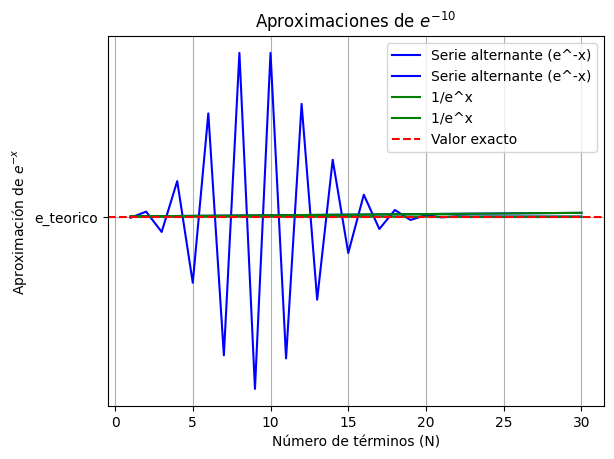

In [55]:
x = 10
exp1_ = []
exp2_ = []
N_vals = []
for N in range(1, 31):
    N_vals.append(N)
    exp1_.append(exp(x, N))
    exp2_.append(exp2(x, N))

# Graficamos las dos aproximaciones
plt.figure()
plt.plot(N_vals, exp1_, label='Serie alternante (e^-x)', color='blue')
plt.plot(N_vals, exp2_, label='1/e^x ', color='green')
plt.axhline(y='e_teorico', color='red', linestyle='--', label='Valor exacto')
plt.xlabel('Número de términos (N)')
plt.ylabel('Aproximación de $e^{-x}$')
plt.title(f'Aproximaciones de $e^{{-{x}}}$')
plt.grid()
plt.legend()
plt.show()

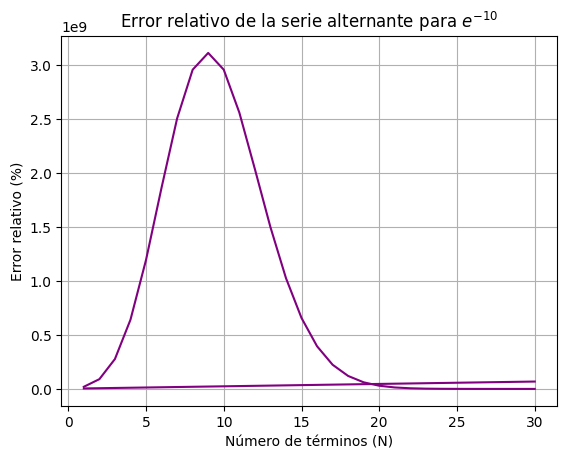

In [56]:
e_exacto= np.exp(-x)
errores = []
for val in exp1_:
    error = abs(val - e_exacto) / abs(e_exacto) * 100
    errores.append(error)

# Graficamos el error relativo
plt.figure()
plt.plot(N_vals, errores, color='purple')
plt.xlabel("Número de términos (N)")
plt.ylabel("Error relativo (%)")
plt.title(f"Error relativo de la serie alternante para $e^{{-{x}}}$")
plt.grid(True)
plt.show()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [ ]:
#Definimos la función
def f(x):
  return x*(x-1)

#Calculamos la derivada usando delta= 1e-2
def derivada(x,delta):
  return (f(x+delta)-f(x))/delta
derivada(1,1e-2)
print(f'El valor computacional de la derivada en x=1 es: {derivada(1,1e-2)}')

#Comparamos con la derivada analítica
print(f'El valor analítico de la derivada en x=1 es: {1}')
error= abs(derivada(1,1e-2)-1)
print(f'El error es: {error}')

#Repetimos para varios valores de delta
delta=[1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
for i in delta:
  print(f'El valor computacional de la derivada en x=1 con delta={i} es: {derivada(1,i)}')

#Al principio, al disminuir delta la precisión mejora porque la fórmula se aproxima mejor al valor real de la derivada. Sin embargo, cuando
#delta se vuelve demasiado pequeño, f(x+δ) y f(x) son tan cercanos que su resta pierde precisión en el computador, por eso llega un punto
#donde ocurre lo contrario y la precisión empeora.